In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/123/SRMAP/Semester 6/Machine Learning Lab/Lab_Task-6/Diabetes Binary Classification.csv")

In [3]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df['Class variable (0 or 1)'].value_counts()

Class variable (0 or 1)
0    500
1    268
Name: count, dtype: int64

In [5]:
df_0 = df[df['Class variable (0 or 1)']==0]
df_0.shape

(500, 9)

In [6]:
df_1 = df[df['Class variable (0 or 1)']==1]
df_1.shape

(268, 9)

In [7]:
df_0_downsampled = df_0.sample(df_1.shape[0])
df_0_downsampled.shape

(268, 9)

In [8]:
df_balanced = pd.concat([df_0_downsampled, df_1])
df_balanced.shape

(536, 9)

In [9]:
df_balanced['Class variable (0 or 1)'].value_counts()

Class variable (0 or 1)
0    268
1    268
Name: count, dtype: int64

In [10]:
df_balanced_features = df_balanced.iloc[:, :-1]  # Features

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced_features,df_balanced['Class variable (0 or 1)'], test_size=0.3, stratify=df_balanced['Class variable (0 or 1)'])

In [12]:
X_train.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
441,2,83,66,23,50,32.2,0.497,22
70,2,100,66,20,90,32.9,0.867,28
293,1,128,48,45,194,40.5,0.613,24
344,8,95,72,0,0,36.8,0.485,57
613,6,105,80,28,0,32.5,0.878,26


In [13]:
X_test.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
375,12,140,82,43,325,39.2,0.528,58
621,2,92,76,20,0,24.2,1.698,28
187,1,128,98,41,58,32.0,1.321,33
580,0,151,90,46,0,42.1,0.371,21
242,3,139,54,0,0,25.6,0.402,22


In [14]:
X_train.count()

Number of times pregnant                                                    375
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    375
Diastolic blood pressure (mm Hg)                                            375
Triceps skin fold thickness (mm)                                            375
2-Hour serum insulin (mu U/ml)                                              375
Body mass index (weight in kg/(height in m)^2)                              375
Diabetes pedigree function                                                  375
Age (years)                                                                 375
dtype: int64

In [15]:
X_test.count()

Number of times pregnant                                                    161
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    161
Diastolic blood pressure (mm Hg)                                            161
Triceps skin fold thickness (mm)                                            161
2-Hour serum insulin (mu U/ml)                                              161
Body mass index (weight in kg/(height in m)^2)                              161
Diabetes pedigree function                                                  161
Age (years)                                                                 161
dtype: int64

In [16]:
import math
def Eucliden_distance(x, y):
    d1 = x['Number of times pregnant'] - y['Number of times pregnant'];
    d2 = x['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'] - y['Plasma glucose concentration a 2 hours in an oral glucose tolerance test'];
    d3 = x['Diastolic blood pressure (mm Hg)'] - y['Diastolic blood pressure (mm Hg)'];
    d4 = x['Triceps skin fold thickness (mm)'] - y['Triceps skin fold thickness (mm)'];
    d5 = x['2-Hour serum insulin (mu U/ml)'] - y['2-Hour serum insulin (mu U/ml)'];
    d6 = x['Body mass index (weight in kg/(height in m)^2)'] - y['Body mass index (weight in kg/(height in m)^2)'];
    d7 = x['Diabetes pedigree function'] - y['Diabetes pedigree function'];
    d8 = x['Age (years)'] - y['Age (years)'];
    return math.sqrt(d1**2 + d2**2 + d3**2 + d4**2 + d5**2 + d6**2 + d7**2 + d8**2);

In [17]:
def K_NN(k):
    y_predicted = [0]*161
    Accuracy = 0
    for i in range(161):
        rank = [0]*375
        dis = [0]*375
        for j in range(375):
            dis[j] = Eucliden_distance(X_train.iloc[j], X_test.iloc[i])
            rank[j] = j
        for e in range(375):
            for j in range(375):
                if(dis[e]<dis[j]):
                    temp = dis[j]
                    dis[j] = dis[e]
                    dis[e] = temp
                    temp1 = rank[j]
                    rank[j] = rank[e]
                    rank[e] = temp1
        No_of_0 = 0
        No_of_1 = 0
        for h in range(k):
            if(y_train.iloc[rank[h]]==0):
                No_of_0+=1
            else:
                No_of_1+=1
        if(No_of_0>No_of_1):
            y_predicted[i] = 0
        else:
            y_predicted[i] = 1
            
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(161):
        if(y_test.iloc[i]==y_predicted[i]):
            if(y_test.iloc[i]==0):
                TP+=1
            else:
                TN+=1
        elif(y_predicted[i]==0):
            FP+=1
        else:
            FN+=1
    Accuracy = (TP + TN) / (TP + FP + TN + FN)
    return Accuracy

In [18]:
k = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]
Accuracy = [0]*len(k)
for i in range(len(k)):
    Accuracy[i] = K_NN(k[i])
    print(k[i], "    ", Accuracy[i])

3      0.6894409937888198
5      0.6956521739130435
7      0.6770186335403726
9      0.7080745341614907
11      0.7453416149068323
13      0.7391304347826086
15      0.7204968944099379
17      0.7329192546583851
19      0.7142857142857143
21      0.6956521739130435
23      0.7018633540372671
25      0.6832298136645962
27      0.6770186335403726
29      0.6832298136645962
31      0.6894409937888198
33      0.6894409937888198
35      0.6645962732919255
37      0.6708074534161491
39      0.6770186335403726
41      0.6770186335403726
43      0.6832298136645962
45      0.6583850931677019
47      0.6583850931677019
49      0.6645962732919255
51      0.6645962732919255


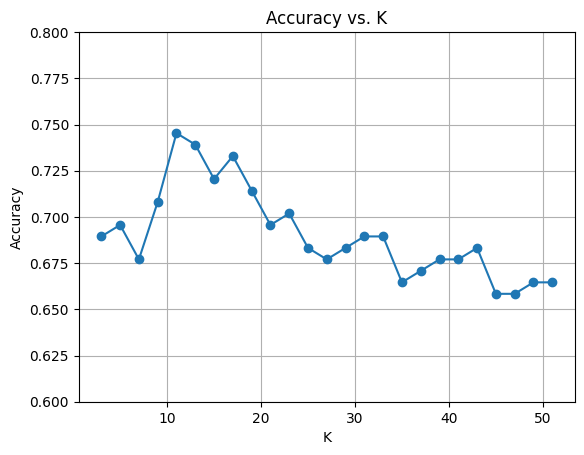

In [19]:
import matplotlib.pyplot as plt
plt.plot(k, Accuracy, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.6, 0.8)  # Limit y-axis to the range 0 to 1
plt.grid(True)
plt.show()